In [51]:
# Import the necessary python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from joblib import load
import pickle

In [2]:
data=pd.read_csv("medical_insurance.csv")
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(2772, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [5]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
data.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


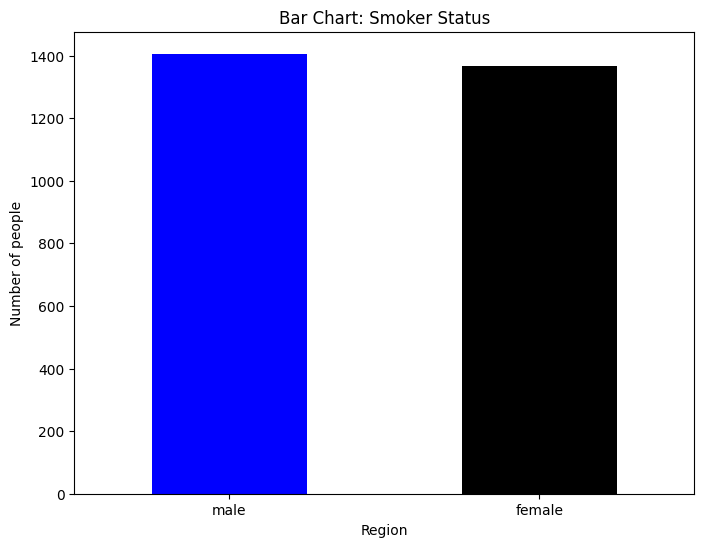

In [8]:
sex= data["sex"].value_counts()
plt.figure(figsize=(8, 6))
sex.plot(kind='bar', color=['blue', 'black'])
plt.title('Bar Chart: Smoker Status')
plt.xlabel('Region')
plt.ylabel('Number of people')
plt.xticks(rotation=0)
plt.show()

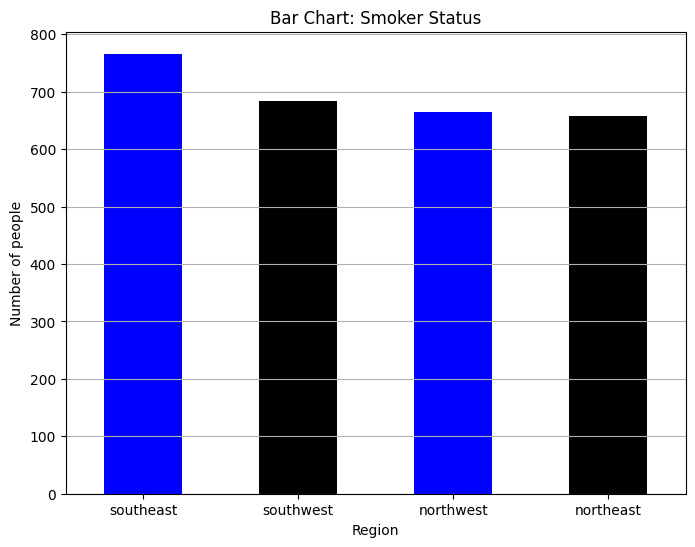

In [9]:
regions=data["region"].value_counts()
plt.figure(figsize=(8, 6))
regions.plot(kind='bar', color=['blue', 'black'])
plt.title('Bar Chart: Smoker Status')
plt.xlabel('Region')
plt.ylabel('Number of people')
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.show()

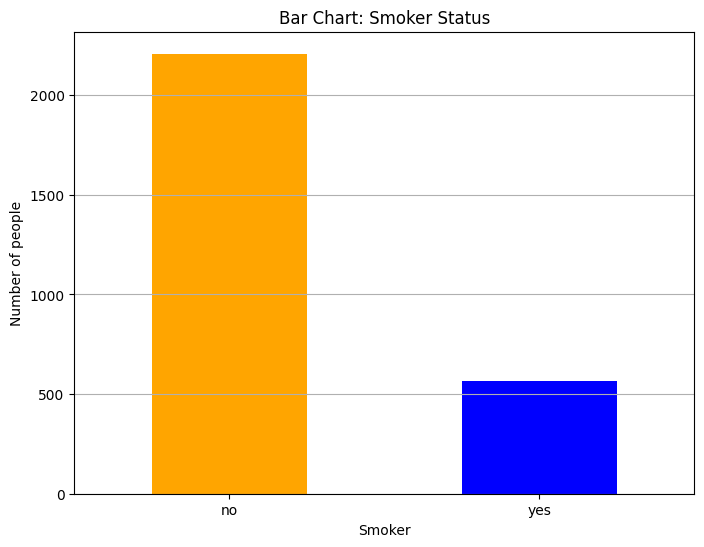

In [10]:
smoker= data["smoker"].value_counts()
plt.figure(figsize=(8, 6))
smoker.plot(kind='bar', color=['orange', 'blue'])
plt.title('Bar Chart: Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Number of people')
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.show()

In [11]:
#data= data.drop(columns="region")

In [58]:
#changing categorical data to numerical
label_encoder = LabelEncoder()

for column in ["sex", "smoker"]:
    data[column] = label_encoder.fit_transform(data[column]) # 0=female and 1=male and
                                                             #for smoker, yes=1 and no=0
# Applying One-Hot Encoding to 'region'
#data = pd.get_dummies(data, columns=['region'], drop_first=True)
#data= data.astype(int)
data.head(5)

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,16884,0,0,1
1,18,1,33,1,0,1725,0,1,0
2,28,1,33,3,0,4449,0,1,0
3,33,1,22,0,0,21984,1,0,0
4,32,1,28,0,0,3866,1,0,0


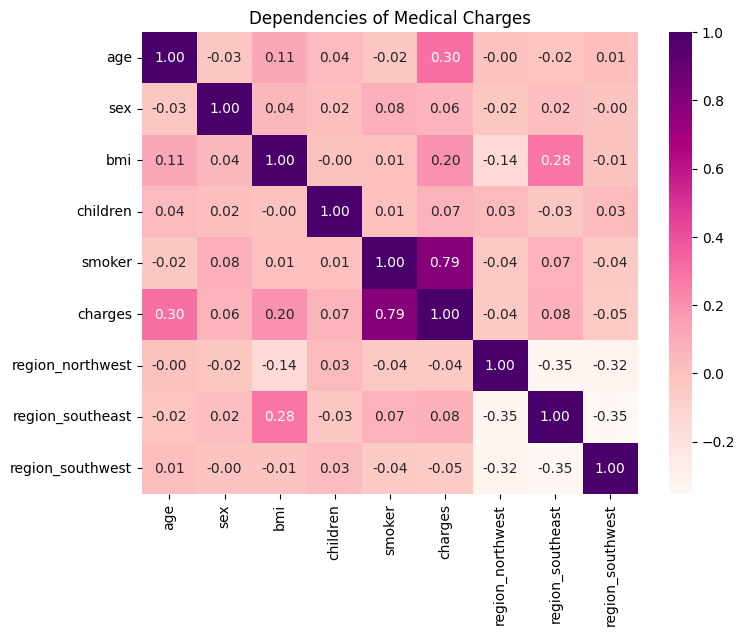

In [19]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr, cmap='RdPu', annot=True, fmt=".2f", ax=ax)
plt.title("Dependencies of Medical Charges")
plt.savefig('Cor')
plt.show()

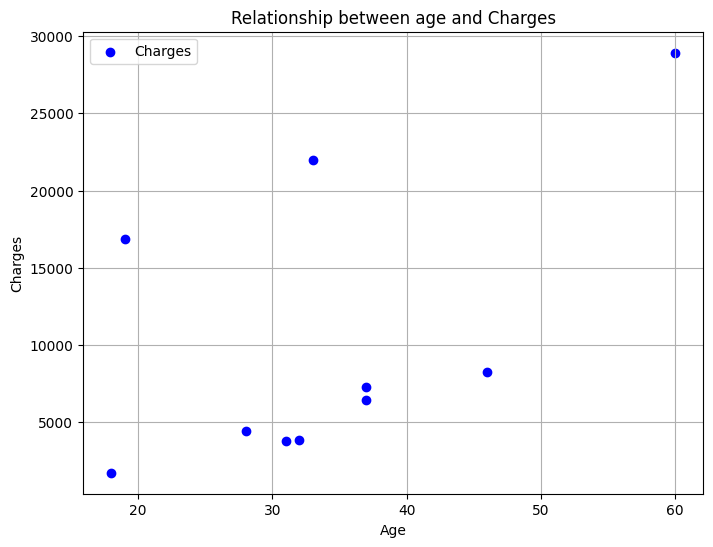

In [60]:
# Scatter plot for age and charges
plt.figure(figsize=(8, 6))
plt.scatter(data['age'].head(10), data['charges'].head(10), color='b', label='Charges')
plt.title("Relationship between age and Charges")
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# Dividing the dataset into target and features
y = data["charges"]
x = data.drop(["charges","region_northwest","region_southeast","region_northwest","region_southwest"], axis=1)

In [28]:
# Split the features and target dataset into train and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# LINEAR REGRESSION MODEL

In [29]:
# Fit model to the training data
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [30]:
# Predict the target values for the features test set
y_pred = model.predict(x_test)

In [31]:
x_test

,age,sex,bmi,children,smoker
1106,49,0,29,0,0
1321,62,1,26,0,1
2313,57,0,20,1,0
2274,22,1,39,0,0
1432,18,0,38,2,0
...,...,...,...,...,...
930,26,1,46,1,0
2610,41,1,23,1,0
1700,27,0,31,0,1
100,41,0,31,0,0


In [32]:
y_pred

array([10012.08017651, 36220.32332115,  9760.80741916,  6101.17643575,
        5740.20143329, 33399.00493358,  6211.86450833, 39155.65218615,
       12094.39765316,  3191.65826272, 12892.30710624, 13271.07839573,
        5545.88369752, 10723.39917481,  4629.61595683,  7309.22382003,
        9891.75023398,  9754.50608839,  5406.90834344,  3550.03479784,
       12142.57475443, 32472.61112089, 30295.04714697, 39900.08716898,
       27270.27077909,  9954.13932747, -1392.87836954, 16235.0750008 ,
        8572.3912739 ,   185.78588715, 14546.708499  ,  3158.80085895,
        2581.88709245,  2779.78912303, 15164.51220853, 12091.6806172 ,
        2126.41097376,  1770.75147461,  8576.83951836, 31399.45317047,
        5438.03453872,  9030.58442855, 13407.45528247,  7106.75166718,
         196.53546238, 40655.01314629,  4539.56308506, 34678.96471269,
        5587.75946803,  7535.67171287, 36352.13008561,  9322.12362571,
        3905.69429699, 10339.07193559,  6563.93971268, 12352.09361908,
      

In [33]:
#Evaluation metrics for the linear regression model
mse = mean_squared_error(y_test, y_pred)
print(mse)
r2 = r2_score(y_test, y_pred)
rmse= np.sqrt(mse)
print(rmse)
print(r2)

40117906.88381129
6333.869818982017
0.7386132996077848


# RANDOM FOREST REGRESSOR

In [42]:
random_forest=RandomForestRegressor()
model_rf= random_forest.fit(x_train,y_train)
y_pred_rf=model_rf.predict(x_test)

# evaluation metrics for the random forest regressor
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(mse)
rmse_rf=np.sqrt(mse_rf)
print(rmse_rf)
r2 = r2_score(y_test, y_pred_rf)
print(r2)

8867910.474834409
3006.8357922828613
0.9410933068965203


## DECISION TREE

In [43]:
decision_tree=DecisionTreeRegressor()
model_dt= decision_tree.fit(x_train,y_train)
y_pred_dt=model_dt.predict(x_test)

#Evaluation metrics

mse_dt = mean_squared_error(y_test, y_pred_dt)
print(mse)
rmse_dt=np.sqrt(mse_dt)
print(rmse_dt)
r2 = r2_score(y_test, y_pred_dt)
print(r2)

8867910.474834409
2597.7370045362054
0.9560321142777919


In [44]:
#Ranking the three models
model_rank = {
'linear regression' : rmse,
'Random Forest' : rmse_rf,
'Decision Trees' : rmse_dt
}
model_rank=sorted(model_rank.items(), key=lambda x: x[1])
print (model_rank)

[('Decision Trees', 2597.7370045362054), ('Random Forest', 3006.8357922828613), ('linear regression', 6333.869818982017)]


In [49]:
#comparing actual and predicted values of linear regression model
predicted_actual= pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Difference': y_test - y_pred
})
predicted_actual.head()

,Actual,Predicted,Difference
1106,8988,10012.080177,-1024.080177
1321,28101,36220.323321,-8119.323321
2313,12032,9760.807419,2271.192581
2274,1682,6101.176436,-4419.176436
1432,3393,5740.201433,-2347.201433


In [56]:
#saving decision tree ,it came out as best model according to the ranking
with open('decisiontrees.pkl','wb')as file:
  pickle.dump(decision_tree,file)

decision_model = load("decisiontrees.pkl")